# Multimodal Bankrupt Companies Dataset Overview

Presented dataset contains information 7214 companies regarding bankruptcy from years 1995-2021. Data for 2748 companies (38% of whole dataset) were synthetically generated.
 
Dataset consists of two parts:
- financial: 17 variables for each object in 5 years period
- textual: summaries of financial reports one year before bankruptcy or last available report for health companies

The source dataset for this dataset was 'ECL' dataset describe in https://arxiv.org/abs/2401.12652. Which contains three information about companies: reference to Compustat DB for financial data, reference to financial reports for each year of company activity and information about bankruptcy status. 

## Financial dataset part


The companies in 'ECL' dataset were matched with companies in gurufocus service and scrapped from it. Unfortunately, less than half of the companies were successfully matched.

The dataset consists of 17 variables for each object in 5 years period.
Dataset was extended with synthetically generated data for positive class.

ECL github: https://github.com/henriarnoUG/ECL/tree/main

### Overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
financial_dataset = pd.read_csv('numerical_dataset_oversampled.csv')
print(financial_dataset.shape)
financial_dataset.head(10)

(36070, 22)


cik ticker  label subset Fiscal Period  Cost of Goods Sold  \
0   737874     LI  False  train      Aug 2002               479.0   
1   737874     LI  False  train      Aug 2003               479.0   
2   737874     LI  False  train      Aug 2004               483.0   
3   737874     LI  False  train      Aug 2005               579.0   
4   737874     LI  False  train      Aug 2006               582.0   
5  1464343   ATLC  False  train      Dec 2016                56.0   
6  1464343   ATLC  False  train      Dec 2017                56.0   
7  1464343   ATLC  False  train      Dec 2018                56.0   
8  1464343   ATLC  False  train      Dec 2019                56.0   
9  1464343   ATLC  False  train      Dec 2020                56.0   

   Depreciation, Depletion and Amortization    EBIT  EBITDA  Gross Profit  \
0                                     281.0  1028.0  1310.0        4004.0   
1                                     281.0  1028.0  1310.0        4004.0   
2                                     284.0   224.0   507.0        4149.0   
3                                     249.0    63.0   312.0        2447.0   
4                                     216.0   261.0   477.0        2550.0   
5                                       7.5    49.0    53.0         135.0   
6                                       1.0    49.0    53.0         135.0   
7                                       1.0    49.0    53.0         135.0   
8                                       7.7    49.0    53.0         135.0   
9                                       8.0    49.0    53.0         135.0   

   ...  Net Income  Retained Earnings  Revenue  Total Assets  \
0  ...     -1223.0              -10.0   4483.0        3853.0   
1  ...     -1223.0              -10.0   4483.0        3853.0   
2  ...        62.0               52.0   4631.0        3905.0   
3  ...       212.0              249.0   3027.0        2909.0   
4  ...       125.0              315.0   3132.0        3039.0   
5  ...        -6.3             -205.9     59.5         362.5   
6  ...       -40.8             -246.6     75.0         425.6   
7  ...         7.9             -238.8    155.3         582.6   
8  ...        26.4             -211.8    357.1         936.3   
9  ...        94.1             -117.7    340.3        1207.2   

   Total Current Assets  Total Current Liabilities  Total Inventories  \
0                 948.0                      695.0               50.0   
1                 948.0                      695.0               50.0   
2                1032.0                      687.0               51.0   
3                 606.0                      448.0               33.0   
4                 741.0                      531.0               41.0   
5                 144.0                       80.0              412.0   
6                 144.0                       80.0              412.0   
7                 144.0                       80.0              412.0   
8                 144.0                       80.0              412.0   
9                 144.0                       80.0              412.0   

   Total Liabilities  Total Operating Expense  Total Receivables  
0             2562.0                   3829.0              570.0  
1             2562.0                   3829.0              570.0  
2             2529.0                   3928.0              588.0  
3             1309.0                   2282.0              203.0  
4             1831.0                   2299.0              211.0  
5              356.8                     82.0              295.8  
6              461.7                     82.0              295.8  
7              604.7                     82.0              295.8  
8              935.9                     82.0              295.8  
9             1130.7                     82.0              295.8  

[10 rows x 22 columns]

Every object consist of 5 years of financial data.

Missing values were filled with fbill and ffill methods. Ticker and Fiscal period are null for synthetic samples.

In [3]:
financial_dataset.isnull().sum().sort_values(ascending=False)

Fiscal Period                               13740
ticker                                      13740
cik                                             0
Net Income                                      0
Total Operating Expense                         0
Total Liabilities                               0
Total Inventories                               0
Total Current Liabilities                       0
Total Current Assets                            0
Total Assets                                    0
Revenue                                         0
Retained Earnings                               0
Market Cap                                      0
Long-Term Debt                                  0
Gross Profit                                    0
EBITDA                                          0
EBIT                                            0
Depreciation, Depletion and Amortization        0
Cost of Goods Sold                              0
subset                                          0


If object had missing feature, then zero was inserted. 

In [4]:
financial_dataset.iloc[:, 5:][financial_dataset == 0].count().sort_values(ascending=False)

Depreciation, Depletion and Amortization    519
Net Income                                  432
EBIT                                        341
EBITDA                                      285
Long-Term Debt                              269
Retained Earnings                           203
Total Receivables                           128
Cost of Goods Sold                           96
Total Inventories                            80
Gross Profit                                 46
Revenue                                      35
Total Current Liabilities                    16
Total Current Assets                         15
Total Operating Expense                      14
Total Liabilities                            11
Total Assets                                 10
Market Cap                                    3
dtype: int64

We need to group the dataset by 'cik' to get unique objects.

In [5]:
financial_data_grouped = financial_dataset.groupby('cik').agg({'label': 'first', 'subset': 'first', 'ticker': 'first'})
print(financial_data_grouped.shape)

(7214, 3)


In [6]:
financial_data_grouped['label'].value_counts(normalize=True)

label
False    0.608816
True     0.391184
Name: proportion, dtype: float64

Before extending the dataset, the distribution of the labels was strongly imbalanced in ratio 61-1. Below cell represents the distribution of the labels before extending the dataset.

In [7]:
financial_data_grouped_original_dataset = financial_data_grouped[~financial_data_grouped['ticker'].isnull()]
financial_data_grouped_original_dataset['label'].value_counts()

label
False    4392
True       74
Name: count, dtype: int64

Artificially generated samples hasn't got 'ticker' and 'Fiscal Period' columns filled. Also 'cik' column for artificial samples is created by concatenating original 'cik' and id (which was number from 0 to 10, because of 10 synthetic samples for each object). There are some inconsistencies in the dataset - not every original sample has 10 synthetic samples.  

To oversample the minority class, the train financial part of dataset was extended using SMOTE algorithm.

In [8]:
financial_data_grouped_original_dataset['subset'].value_counts()

subset
train    3012
test     1091
val       363
Name: count, dtype: int64

In [9]:
financial_data_grouped[financial_data_grouped['subset'] == 'test']['label'].value_counts(normalize=True)

label
False    0.989918
True     0.010082
Name: proportion, dtype: float64

Features overview

In [11]:
financial_dataset.describe()

cik  Cost of Goods Sold  \
count  3.607000e+04        36070.000000   
mean   3.416241e+07         2105.742876   
std    5.135629e+07        10113.425277   
min    1.800000e+03        -1647.000000   
25%    9.143730e+05          143.000000   
50%    1.368712e+06          383.000000   
75%    8.773550e+07          979.000000   
max    1.722287e+08       420315.000000   

       Depreciation, Depletion and Amortization           EBIT         EBITDA  \
count                              36070.000000   36070.000000   36070.000000   
mean                                 163.057732     252.656770     430.266707   
std                                  788.113187    1983.265154    2480.379924   
min                                  -59.000000  -27725.000000  -27317.000000   
25%                                   10.000000     -12.200000       7.000000   
50%                                   27.000000      32.000000      60.750000   
75%                                  105.000000     156.000000     252.000000   
max                                46009.000000  111852.000000  123136.000000   

        Gross Profit  Long-Term Debt     Market Cap    Net Income  \
count   36070.000000    36070.000000   36070.000000  36070.000000   
mean      954.520918     1625.933400    6284.837806    120.626044   
std      4018.843580     9244.430778   23869.024832   1573.742952   
min     -5685.000000        0.000000       0.000000 -27590.000000   
25%        93.800000       93.000000     299.000000    -34.000000   
50%       206.600000      299.000000     977.300000      6.300000   
75%       571.000000      948.500000    3854.750000     58.200000   
max    152836.000000   429944.000000  995107.000000  94680.000000   

       Retained Earnings        Revenue   Total Assets  Total Current Assets  \
count       36070.000000   36070.000000   36070.000000          36070.000000   
mean          757.555676    2620.918359    6275.885746           1291.278005   
std          9084.403328   12529.915886   30020.941052           5479.349278   
min        -85041.000000   -1992.140000       0.000000              0.000000   
25%          -142.000000     197.000000     387.000000            143.000000   
50%            17.000000     522.000000     825.000000            290.000000   
75%           198.162500    1203.000000    2911.675000            702.000000   
max        444626.000000  559151.000000  992968.000000         184406.000000   

       Total Current Liabilities  Total Inventories  Total Liabilities  \
count               36070.000000       36070.000000       36070.000000   
mean                  986.740361         307.991335        4763.971091   
std                  4149.024154        1310.864876       24944.109332   
min                     0.000000           0.000000       -4733.000000   
25%                    74.000000          24.000000         226.000000   
50%                   156.000000          73.000000         575.000000   
75%                   455.000000         205.000000        1988.925000   
max                125481.000000       81715.000000      902703.000000   

       Total Operating Expense  Total Receivables  
count             36070.000000       36070.000000  
mean                715.326222         489.174998  
std                2753.406408        2705.851762  
min               -3518.000000           0.000000  
25%                  89.400000          27.100000  
50%                 202.000000          69.250000  
75%                 462.000000         207.000000  
max              116288.000000      128387.000000

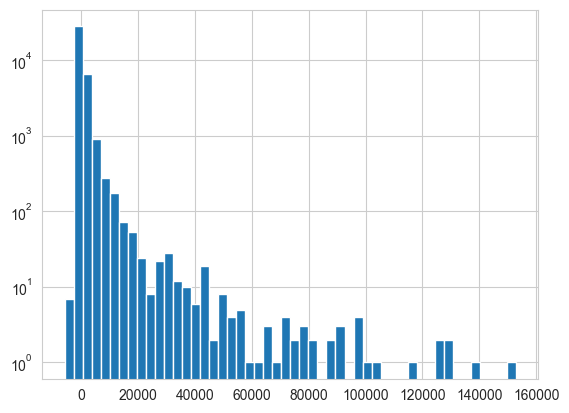

In [12]:
plt.hist(financial_dataset['Gross Profit'].values, bins=50)
plt.yscale('log')
plt.show()

### Example usage

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score

random_state = 42

In [15]:
financial_dataset_preprocessed = financial_dataset.drop(['cik', 'ticker', 'Fiscal Period'], axis=1)
X = financial_dataset_preprocessed.drop('label', axis=1)
y = financial_dataset_preprocessed['label']

In [16]:
def get_train_val_test_split(X, y):
    X_train = X[X['subset'] == 'train']
    y_train = y[X['subset'] == 'train']
    
    X_val = X[X['subset'] == 'val']
    y_val = y[X['subset'] == 'val']
    
    X_test = X[X['subset'] == 'test']
    y_test = y[X['subset'] == 'test']
    
    X_train = X_train.drop('subset', axis=1)
    X_val = X_val.drop('subset', axis=1)
    X_test = X_test.drop('subset', axis=1)
    
    return X_train, y_train, X_val, y_val, X_test, y_test

In [17]:
X_train, y_train, X_val, y_val, X_test, y_test = get_train_val_test_split(X, y)

len(X_train)/5, len(X_val)/5, len(X_test)/5

(5760.0, 363.0, 1091.0)

In [18]:
from sklearn import preprocessing

X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

scaler = preprocessing.StandardScaler().fit(X_train_val)

X_train_val = scaler.transform(X_train_val)
X_test = scaler.transform(X_test)

In [19]:
logistic_regression_model = LogisticRegression(random_state=random_state, max_iter=300)
logistic_regression_model.fit(X_train_val, y_train_val)

y_pred = logistic_regression_model.predict(X_test)

In [20]:
confusion_matrix(y_test, y_pred)

array([[3876, 1524],
       [  19,   36]], dtype=int64)

In [21]:
print(f'accuracy_score: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'f1_score: {f1_score(y_test, y_pred)}')

accuracy_score: 0.7171402383134738
Precision: 0.023076923076923078
f1_score: 0.04458204334365325


### Feature analysis

#### Checking feature importance with PCA


In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

n_components = 2  

pca = PCA(n_components=n_components)

pca.fit(X_train_scaled)

X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

C:\Users\grzeg\PycharmProjects\bankruptcy-prophet-new\bankruptcy-prophet\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [23]:
import pandas as pd

loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(n_components)], index=X_train.columns)

loadings['PC1'].sort_values(ascending=False)

Gross Profit                                0.294700
Revenue                                     0.286065
EBITDA                                      0.283152
Depreciation, Depletion and Amortization    0.269186
Total Operating Expense                     0.267425
Total Current Assets                        0.266892
Total Current Liabilities                   0.265418
EBIT                                        0.264207
Net Income                                  0.252458
Market Cap                                  0.241838
Cost of Goods Sold                          0.238642
Retained Earnings                           0.215262
Total Assets                                0.208335
Total Receivables                           0.204223
Total Inventories                           0.194103
Total Liabilities                           0.174766
Long-Term Debt                              0.129790
Name: PC1, dtype: float64

The analysis of PC1 shows that each feature is important.

In [24]:
loadings['PC2'].sort_values(ascending=False)

Total Inventories                           0.360035
Cost of Goods Sold                          0.344569
Total Operating Expense                     0.283193
Total Current Liabilities                   0.216285
Gross Profit                                0.200064
Long-Term Debt                              0.146150
Total Current Assets                        0.143616
Revenue                                     0.096715
Depreciation, Depletion and Amortization   -0.047538
EBITDA                                     -0.096915
EBIT                                       -0.122519
Market Cap                                 -0.136419
Net Income                                 -0.247888
Total Receivables                          -0.273275
Total Liabilities                          -0.331363
Retained Earnings                          -0.339185
Total Assets                               -0.356448
Name: PC2, dtype: float64

#### Checking feature importance with VarianceThreshold and SelectKBest

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.ensemble import RandomForestClassifier

financial_dataset_preprocessed = financial_dataset.drop(['cik', 'ticker', 'Fiscal Period'], axis=1)
X = financial_dataset_preprocessed.drop('label', axis=1)
y = financial_dataset_preprocessed['label']

X_pure = X.drop('subset', axis=1)

X_train, y_train, X_val, y_val, X_test, y_test = get_train_val_test_split(X, y)
y_test = y_test.astype(int).values

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif

selector = VarianceThreshold(threshold=0.01)
X_filtered = selector.fit_transform(X_train_scaled)

selector = SelectKBest(f_classif, k=5)  
X_new_train = selector.fit_transform(X_filtered, y_train)
X_new_test = selector.transform(X_test_scaled)


logistic_regression_model = RandomForestClassifier()
logistic_regression_model.fit(X_new_train, y_train)

y_pred = logistic_regression_model.predict(X_new_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Mean Squared Error: 0.10229147571035747
Accuracy: 0.8977085242896425


In [28]:
financial_dataset_columns = X_pure.columns[selector.get_support()]
financial_dataset_columns

Index(['Depreciation, Depletion and Amortization', 'EBITDA', 'Gross Profit',
       'Total Current Assets', 'Total Inventories'],
      dtype='object')

In [29]:
importance = logistic_regression_model.feature_importances_
most_important_feature_index = np.argmax(importance)
financial_dataset_columns[most_important_feature_index]

'EBITDA'

The most important feature is 'EBITDA'.

#### Checking feature importance with Lasso

In [30]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.0005)
lasso.fit(X_train_scaled, y_train)

y_pred = lasso.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

coefficients = pd.DataFrame({'Feature': X_pure.columns, 'Coefficient': lasso.coef_})
relevant_features = coefficients[coefficients['Coefficient'] != 0]['Feature']
irrelevant_features = coefficients[coefficients['Coefficient'] == 0]['Feature']

print(f"Number of relevant features: {len(relevant_features)}")
print(f"Irrlevant features: {irrelevant_features.values}")

Mean Squared Error: 0.2560251495386637
Number of relevant features: 17
Irrlevant features: []


C:\Users\grzeg\PycharmProjects\bankruptcy-prophet-new\bankruptcy-prophet\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.482e+00, tolerance: 7.195e-01
  model = cd_fast.enet_coordinate_descent(


In [31]:
coefficients[coefficients['Coefficient'] != 0]

Feature  Coefficient
0                         Cost of Goods Sold     0.006622
1   Depreciation, Depletion and Amortization     0.055592
2                                       EBIT     0.338665
3                                     EBITDA    -0.277942
4                               Gross Profit    -0.240745
5                             Long-Term Debt    -0.055628
6                                 Market Cap     0.033921
7                                 Net Income    -0.054676
8                          Retained Earnings    -0.025694
9                                    Revenue     0.043900
10                              Total Assets    -0.149993
11                      Total Current Assets    -0.033723
12                 Total Current Liabilities     0.061180
13                         Total Inventories    -0.094886
14                         Total Liabilities     0.104365
15                   Total Operating Expense     0.186728
16                         Total Receivables    -0.004146

In [32]:
lasso.coef_

array([ 0.00662195,  0.05559215,  0.33866482, -0.27794235, -0.24074489,
       -0.05562765,  0.0339208 , -0.05467641, -0.02569435,  0.04389973,
       -0.14999316, -0.03372341,  0.06117989, -0.09488567,  0.10436542,
        0.18672772, -0.00414595])

### Useful functions to work with the dataset

#### Functions for (de)flattening the dataset

Function flattens 5 years (rows) to single row.

In [33]:
def flatten_financial_dataset(financial_dataset):
    object_length_in_rows = 5
    metadata_columns_length = 5
    
    per_object_columns = list(financial_dataset.columns[:metadata_columns_length].values)
    
    value_columns = financial_dataset.columns[metadata_columns_length:]
    new_columns = per_object_columns + [f'{col}_{i+1}' for i in range(object_length_in_rows) for col in value_columns]
    
    dfs = []
    
    for i in range(0, len(financial_dataset), object_length_in_rows):
        group = financial_dataset.iloc[i:i + object_length_in_rows]
        if len(group) < object_length_in_rows:
            break

        cik = group['cik'].iloc[0]
        ticker = group['ticker'].iloc[0]
        label = group['label'].iloc[0]
        subset = group['subset'].iloc[0]
        fiscal_periods = ';'.join(group['Fiscal Period'].astype(str).values)

        values = group.drop(columns=per_object_columns).values.flatten()
        
        dfs.append([cik, ticker, label, subset, fiscal_periods] + values.tolist())
    
    final_flatten_df = pd.DataFrame(dfs, columns=new_columns)
    final_flatten_df = final_flatten_df.reset_index(drop=True)
    return final_flatten_df

In [34]:
flatten_df = flatten_financial_dataset(financial_dataset)
print(flatten_df.shape)
flatten_df.head()

(7214, 90)


cik ticker  label subset  \
0     737874     LI  False  train   
1    1464343   ATLC  False  train   
2  102336208    NaN   True  train   
3    1022368    SHF  False  train   
4     815094   ABMD  False  train   

                                  Fiscal Period  Cost of Goods Sold_1  \
0  Aug 2002;Aug 2003;Aug 2004;Aug 2005;Aug 2006                 479.0   
1  Dec 2016;Dec 2017;Dec 2018;Dec 2019;Dec 2020                  56.0   
2                           nan;nan;nan;nan;nan                  30.0   
3  May 2008;May 2009;May 2010;May 2011;May 2012                 124.0   
4  Mar 2017;Mar 2018;Mar 2019;Mar 2020;Mar 2021                  71.0   

   Depreciation, Depletion and Amortization_1  EBIT_1  EBITDA_1  \
0                                       281.0  1028.0    1310.0   
1                                         7.5    49.0      53.0   
2                                         9.0     8.0      18.0   
3                                         3.0    15.0      18.0   
4                                         6.0    90.0      96.0   

   Gross Profit_1  ...  Net Income_5  Retained Earnings_5  Revenue_5  \
0          4004.0  ...         125.0                315.0     3132.0   
1           135.0  ...          94.1               -117.7      340.3   
2            35.0  ...         -35.0                -19.0      186.0   
3            67.0  ...          14.0                 22.0      259.0   
4           375.0  ...         226.0                828.0      848.0   

   Total Assets_5  Total Current Assets_5  Total Current Liabilities_5  \
0          3039.0                   741.0                        531.0   
1          1207.2                   144.0                         80.0   
2           379.0                    82.0                         49.0   
3           332.0                    91.0                         39.0   
4          1494.0                   788.0                        129.0   

   Total Inventories_5  Total Liabilities_5  Total Operating Expense_5  \
0                 41.0               1831.0                     2299.0   
1                412.0               1130.7                       82.0   
2                 12.0                278.0                       59.0   
3                 41.0                219.0                       94.0   
4                 81.0                165.0                      456.0   

   Total Receivables_5  
0                211.0  
1                295.8  
2                 50.0  
3                 30.0  
4                 97.0  

[5 rows x 90 columns]

### Usage of flattened dataset

In [58]:
flatten_financial_dataset_preprocessed = flatten_df.drop(['cik', 'ticker', 'Fiscal Period'], axis=1)
X = flatten_financial_dataset_preprocessed.drop('label', axis=1)
y = flatten_financial_dataset_preprocessed['label']

X_train, y_train, X_val, y_val, X_test, y_test = get_train_val_test_split(X, y)

len(X_train), len(X_val), len(X_test)

(5760, 363, 1091)

In [59]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
logistic_regression_model = LogisticRegression(random_state=random_state, max_iter=300)
logistic_regression_model.fit(X_train, y_train)

y_pred = logistic_regression_model.predict(X_test)

print(f'accuracy_score: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'f1_score: {f1_score(y_test, y_pred)}')

accuracy_score: 0.769019248395967
Precision: 0.038314176245210725
f1_score: 0.07352941176470588


Flattening the dataset improves the accuracy by ~5%.

### De-flattening the dataset

In [42]:
flatten_df.head()

cik ticker  label subset  \
0     737874     LI  False  train   
1    1464343   ATLC  False  train   
2  102336208    NaN   True  train   
3    1022368    SHF  False  train   
4     815094   ABMD  False  train   

                                  Fiscal Period  Cost of Goods Sold_1  \
0  Aug 2002;Aug 2003;Aug 2004;Aug 2005;Aug 2006                 479.0   
1  Dec 2016;Dec 2017;Dec 2018;Dec 2019;Dec 2020                  56.0   
2                           nan;nan;nan;nan;nan                  30.0   
3  May 2008;May 2009;May 2010;May 2011;May 2012                 124.0   
4  Mar 2017;Mar 2018;Mar 2019;Mar 2020;Mar 2021                  71.0   

   Depreciation, Depletion and Amortization_1  EBIT_1  EBITDA_1  \
0                                       281.0  1028.0    1310.0   
1                                         7.5    49.0      53.0   
2                                         9.0     8.0      18.0   
3                                         3.0    15.0      18.0   
4                                         6.0    90.0      96.0   

   Gross Profit_1  ...  Net Income_5  Retained Earnings_5  Revenue_5  \
0          4004.0  ...         125.0                315.0     3132.0   
1           135.0  ...          94.1               -117.7      340.3   
2            35.0  ...         -35.0                -19.0      186.0   
3            67.0  ...          14.0                 22.0      259.0   
4           375.0  ...         226.0                828.0      848.0   

   Total Assets_5  Total Current Assets_5  Total Current Liabilities_5  \
0          3039.0                   741.0                        531.0   
1          1207.2                   144.0                         80.0   
2           379.0                    82.0                         49.0   
3           332.0                    91.0                         39.0   
4          1494.0                   788.0                        129.0   

   Total Inventories_5  Total Liabilities_5  Total Operating Expense_5  \
0                 41.0               1831.0                     2299.0   
1                412.0               1130.7                       82.0   
2                 12.0                278.0                       59.0   
3                 41.0                219.0                       94.0   
4                 81.0                165.0                      456.0   

   Total Receivables_5  
0                211.0  
1                295.8  
2                 50.0  
3                 30.0  
4                 97.0  

[5 rows x 90 columns]

In [43]:
def deflatten_financial_dataset(flatten_df):
    object_length_in_rows = 5
    metadata_columns_length = 5

    values_columns = flatten_df.columns[metadata_columns_length:]
    unique_values_columns = sorted(set(col.split('_')[0] for col in values_columns))
    
    new_columns = flatten_df.columns[:metadata_columns_length].tolist() + unique_values_columns

    deflattened_rows = []

    for _, row in flatten_df.iterrows():
        first_columns = row.values[:metadata_columns_length]
        fiscal_periods = row.values[4].split(';')
        
        reshaped_values = np.array(row.values[metadata_columns_length:]).reshape(object_length_in_rows, -1)
        
        for i in range(object_length_in_rows):
            new_row = np.concatenate([first_columns[:4], [fiscal_periods[i]], reshaped_values[i]])
            deflattened_rows.append(new_row)

    deflatten_df = pd.DataFrame(deflattened_rows, columns=new_columns)
    
    return deflatten_df.reset_index(drop=True)

In [44]:
deflatten_df = deflatten_financial_dataset(flatten_df)
deflatten_df.head()

cik ticker  label subset Fiscal Period  Cost of Goods Sold  \
0  737874     LI  False  train      Aug 2002               479.0   
1  737874     LI  False  train      Aug 2003               479.0   
2  737874     LI  False  train      Aug 2004               483.0   
3  737874     LI  False  train      Aug 2005               579.0   
4  737874     LI  False  train      Aug 2006               582.0   

   Depreciation, Depletion and Amortization    EBIT  EBITDA  Gross Profit  \
0                                     281.0  1028.0  1310.0        4004.0   
1                                     281.0  1028.0  1310.0        4004.0   
2                                     284.0   224.0   507.0        4149.0   
3                                     249.0    63.0   312.0        2447.0   
4                                     216.0   261.0   477.0        2550.0   

   ...  Net Income  Retained Earnings  Revenue  Total Assets  \
0  ...     -1223.0              -10.0   4483.0        3853.0   
1  ...     -1223.0              -10.0   4483.0        3853.0   
2  ...        62.0               52.0   4631.0        3905.0   
3  ...       212.0              249.0   3027.0        2909.0   
4  ...       125.0              315.0   3132.0        3039.0   

   Total Current Assets  Total Current Liabilities  Total Inventories  \
0                 948.0                      695.0               50.0   
1                 948.0                      695.0               50.0   
2                1032.0                      687.0               51.0   
3                 606.0                      448.0               33.0   
4                 741.0                      531.0               41.0   

   Total Liabilities  Total Operating Expense  Total Receivables  
0             2562.0                   3829.0              570.0  
1             2562.0                   3829.0              570.0  
2             2529.0                   3928.0              588.0  
3             1309.0                   2282.0              203.0  
4             1831.0                   2299.0              211.0  

[5 rows x 22 columns]

### Plotting flatten data correlation

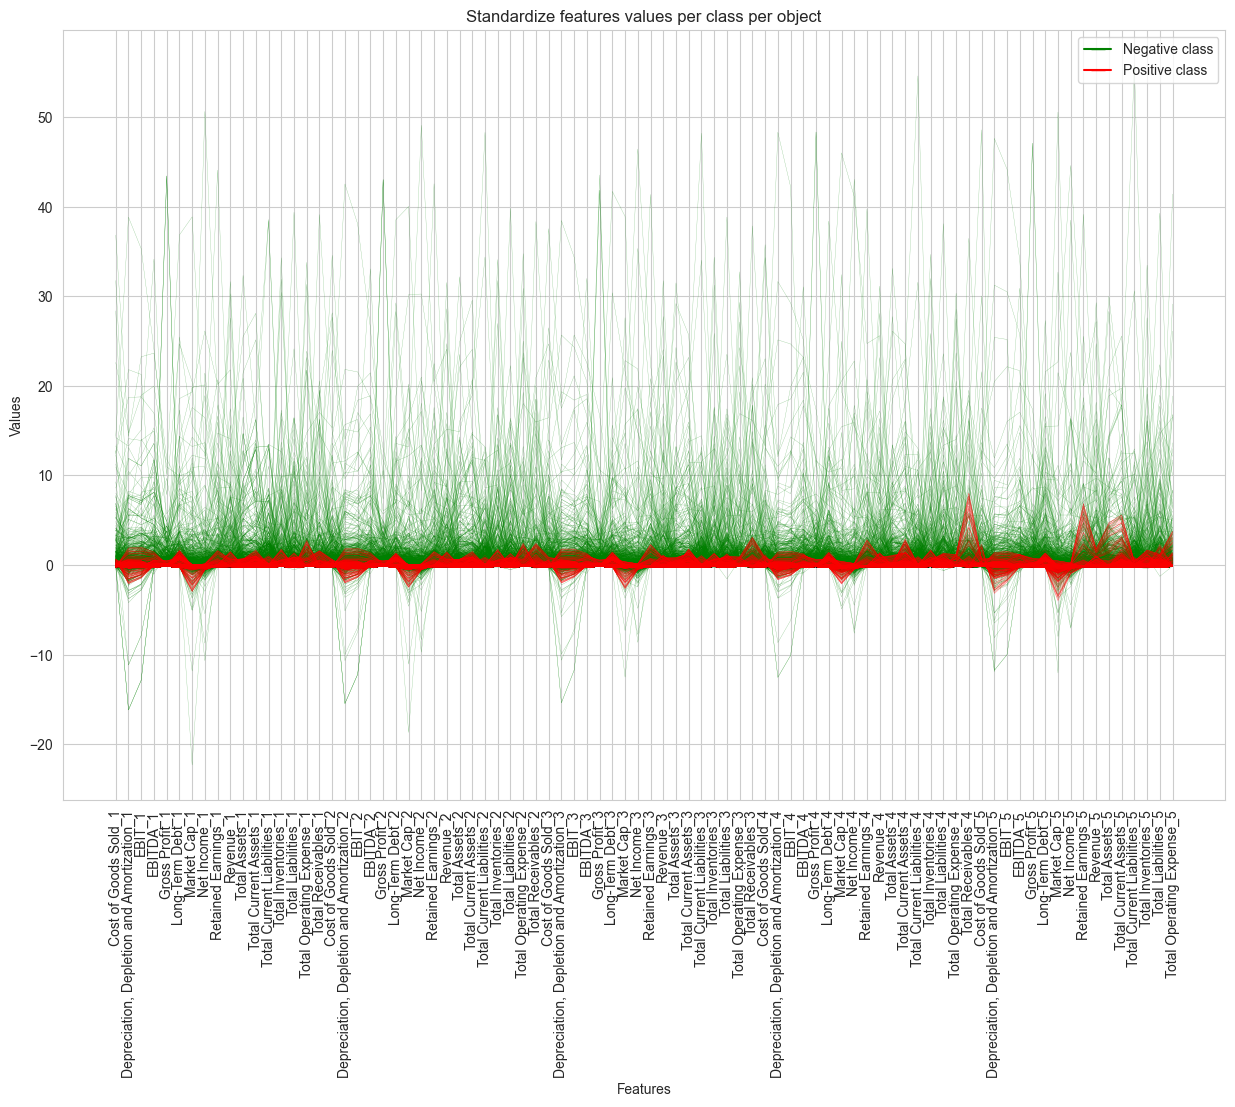

In [45]:
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D

flatten_df_preprocessed = flatten_df.drop(['cik', 'ticker', 'Fiscal Period', 'subset'], axis=1)
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(flatten_df_preprocessed.drop('label', axis=1)), columns=flatten_df_preprocessed.columns[:-1])

scaled_data['label'] = flatten_df_preprocessed['label'].values

# split the flatten data into two subsets: negative and positive
flatten_df_preprocessed_negative = scaled_data[scaled_data['label'] == 0]
flatten_df_preprocessed_positive = scaled_data[scaled_data['label'] == 1]
flatten_df_preprocessed_negative = flatten_df_preprocessed_negative.drop('label', axis=1)
flatten_df_preprocessed_positive = flatten_df_preprocessed_positive.drop('label', axis=1)

# get every fifth row to reduce the number of points
# flatten_df_preprocessed_negative = flatten_df_preprocessed_negative.iloc[::5]
# flatten_df_preprocessed_positive = flatten_df_preprocessed_positive.iloc[::5]

flatten_df_preprocessed_negative = flatten_df_preprocessed_negative.replace(0, np.nan).dropna()
flatten_df_preprocessed_positive = flatten_df_preprocessed_positive.replace(0, np.nan).dropna()

plt.figure(figsize=(15, 10))

plt.plot(flatten_df_preprocessed_negative.T, color='green', alpha=0.5, label='Negative', linewidth=0.2)
plt.plot(flatten_df_preprocessed_positive.T, color='red', alpha=0.5, label='Positive', linewidth=0.2)

legend_elements = [
    Line2D([0], [0], marker='_', color='green', label='Negative class', markersize=10),
    Line2D([0], [0], marker='_', color='red', label='Positive class', markersize=10)
]

plt.legend(handles=legend_elements, loc='upper right')
# plt.yscale('log')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Standardize features values per class per object')
plt.show()

#### Plotting per not-flatten object

In [46]:
financial_df_preprocessed = financial_dataset.drop(['cik', 'ticker', 'Fiscal Period', 'subset'], axis=1)
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(financial_df_preprocessed.drop('label', axis=1)), columns=financial_df_preprocessed.columns[:-1])

scaled_data['label'] = financial_df_preprocessed['label'].values

# split the flatten data into two subsets: negative and positive
financial_df_preprocessed_negative = financial_df_preprocessed[financial_df_preprocessed['label'] == 0]
financial_df_preprocessed_positive = financial_df_preprocessed[financial_df_preprocessed['label'] == 1]

financial_df_preprocessed_negative = financial_df_preprocessed_negative.drop('label', axis=1)
financial_df_preprocessed_positive = financial_df_preprocessed_positive.drop('label', axis=1)
# get every fifth row to reduce the number of points
financial_df_preprocessed_negative = financial_df_preprocessed_negative.iloc[::10]
financial_df_preprocessed_positive = financial_df_preprocessed_positive.iloc[::10]

In [47]:
max_value = max(
    financial_df_preprocessed_positive.max().max(),
    financial_df_preprocessed_negative.max().max()
)

min_value_cropped = min(
    max(financial_df_preprocessed_positive.min().min(), 1),
    max(financial_df_preprocessed_negative.min().min(), 1)
)

Plot of negative class features values per object.

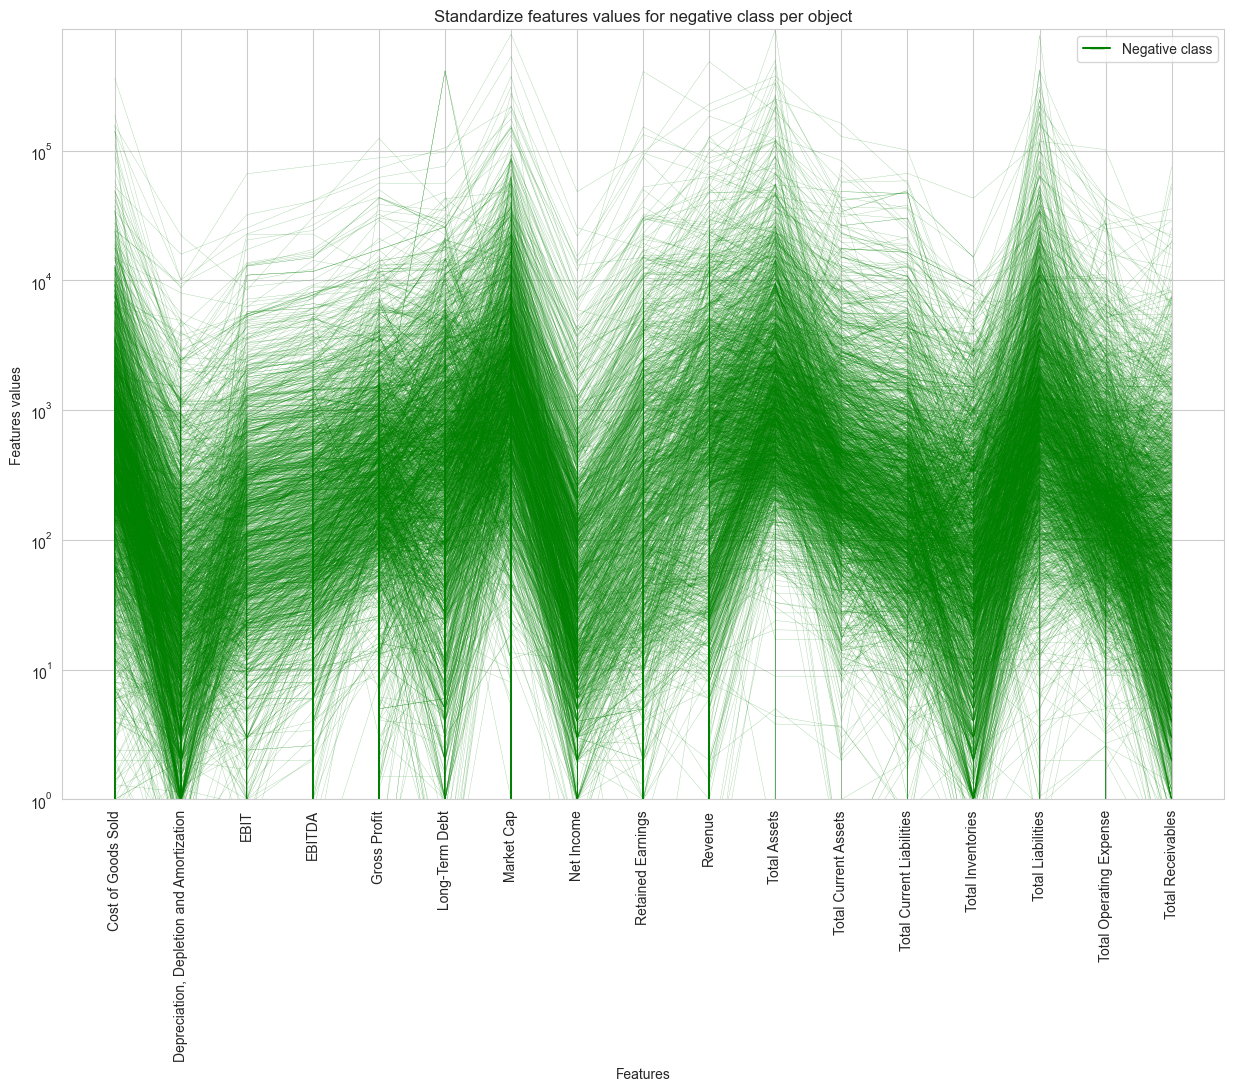

In [48]:
plt.figure(figsize=(15, 10))

plt.plot(financial_df_preprocessed_negative.T, color='green', alpha=0.5, label='Negative', linewidth=0.2)

legend_elements = [
    Line2D([0], [0], marker='_', color='green', label='Negative class', markersize=10),
]

plt.legend(handles=legend_elements, loc='upper right')
plt.yscale('log')
plt.ylim(min_value_cropped, max_value) 
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Features values')
plt.title('Standardize features values for negative class per object')
plt.show()

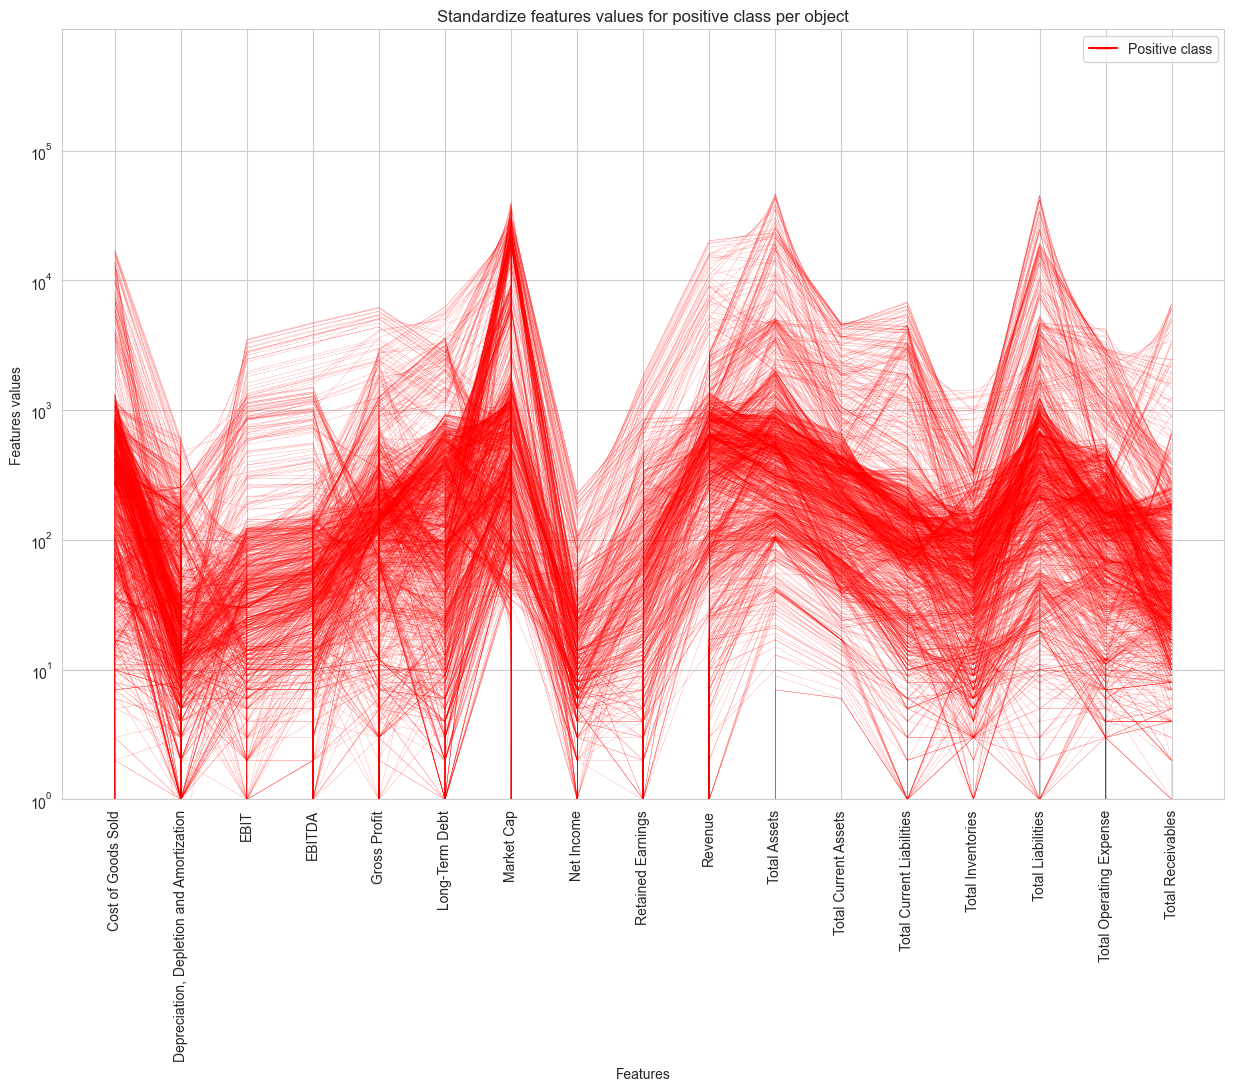

In [49]:
plt.figure(figsize=(15, 10))

plt.plot(financial_df_preprocessed_positive.T, color='red', alpha=0.5, label='Positive', linewidth=0.2)

legend_elements = [
    Line2D([0], [0], marker='_', color='red', label='Positive class', markersize=10),
]

plt.legend(handles=legend_elements, loc='upper right')
plt.yscale('log')
plt.ylim(min_value_cropped, max_value)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Features values')
plt.title('Standardize features values for positive class per object')
plt.show()

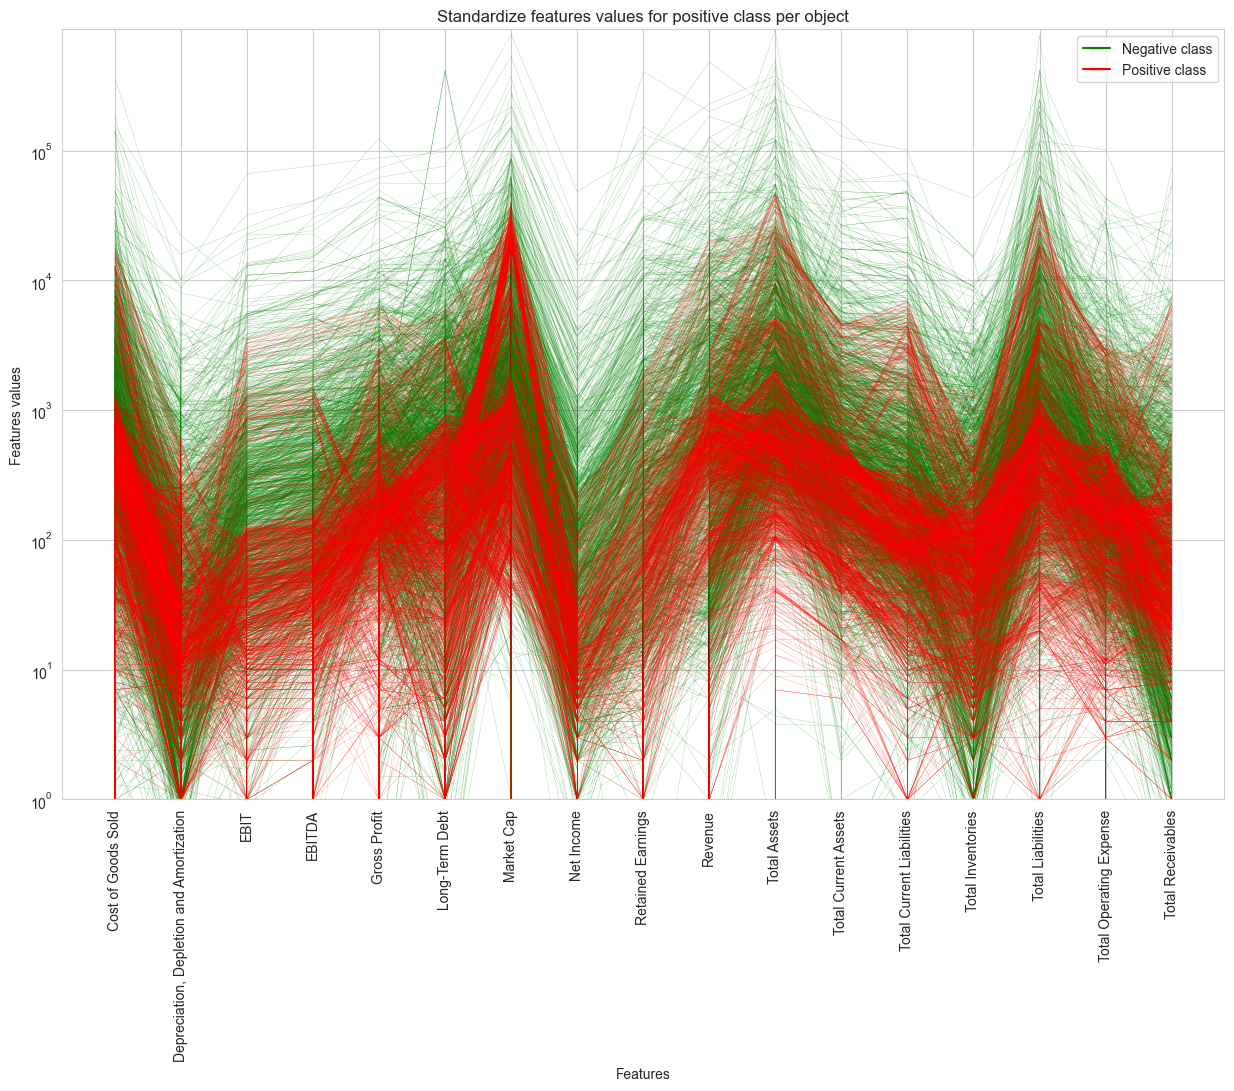

In [50]:
plt.figure(figsize=(15, 10))

plt.plot(financial_df_preprocessed_negative.T, color='green', alpha=0.5, label='Negative', linewidth=0.2)
plt.plot(financial_df_preprocessed_positive.T, color='red', alpha=0.5, label='Positive', linewidth=0.2)

legend_elements = [
    Line2D([0], [0], marker='_', color='green', label='Negative class', markersize=10),
    Line2D([0], [0], marker='_', color='red', label='Positive class', markersize=10)
]

plt.legend(handles=legend_elements, loc='upper right')
plt.yscale('log')
plt.ylim(min_value_cropped, max_value)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Features values')
plt.title('Standardize features values for positive class per object')
plt.show()

#### Function for shuffling the dataset

In [51]:
import random

def shuffle_data_by_object(df):

    data = df.values.tolist()
    shuffled_data = []
    object_data = {}

    for row in data:
        cik = row[0]
        if cik not in object_data:
            object_data[cik] = []
        object_data[cik].append(row)

    shuffled_object_keys = list(object_data.keys())
    random.shuffle(shuffled_object_keys)

    for cik in shuffled_object_keys:
        shuffled_data.extend(object_data[cik])

    shuffled_df = pd.DataFrame(shuffled_data, columns=df.columns).reset_index(drop=True)
    return shuffled_df

In [52]:
shuffled_df = shuffle_data_by_object(financial_dataset)
shuffled_df.head(10)

cik ticker  label subset Fiscal Period  Cost of Goods Sold  \
0    884497   MEDQ  False  train      Dec 2006               261.0   
1    884497   MEDQ  False  train      Dec 2007               261.0   
2    884497   MEDQ  False  train      Dec 2008               230.0   
3    884497   MEDQ  False  train      Dec 2009               206.0   
4    884497   MEDQ  False  train      Dec 2010               250.0   
5  78611006    NaN   True  train           NaN               743.0   
6  78611006    NaN   True  train           NaN               743.0   
7  78611006    NaN   True  train           NaN               846.0   
8  78611006    NaN   True  train           NaN               759.0   
9  78611006    NaN   True  train           NaN               723.0   

   Depreciation, Depletion and Amortization  EBIT  EBITDA  Gross Profit  ...  \
0                                      16.0 -22.0    -5.0          79.0  ...   
1                                      16.0 -22.0    -5.0          79.0  ...   
2                                      18.0 -88.0   -71.0          96.0  ...   
3                                      16.0  23.0    39.0         101.0  ...   
4                                      22.0  40.0    62.0         126.0  ...   
5                                      23.0   4.0    27.0         136.0  ...   
6                                      23.0   4.0    27.0         136.0  ...   
7                                      20.0  80.0   100.0         137.0  ...   
8                                      17.0 -11.0     4.0         113.0  ...   
9                                      15.0 -87.0   -73.0         101.0  ...   

   Net Income  Retained Earnings  Revenue  Total Assets  Total Current Assets  \
0       -15.0               73.0    340.0         418.0                 219.0   
1       -15.0               73.0    340.0         418.0                 219.0   
2       -69.0              -99.0    327.0         202.0                  98.0   
3        23.0             -126.0    307.0         175.0                  75.0   
4        31.0             -271.0    375.0         324.0                 127.0   
5       -91.0              -38.0    879.0         865.0                 407.0   
6       -91.0              -38.0    879.0         865.0                 407.0   
7        31.0                0.0    984.0         673.0                 219.0   
8       -27.0              -22.0    873.0         631.0                 202.0   
9       -93.0             -116.0    825.0         452.0                 185.0   

   Total Current Liabilities  Total Inventories  Total Liabilities  \
0                       86.0              279.0              103.0   
1                       86.0              279.0              103.0   
2                       59.0              279.0               62.0   
3                       55.0              279.0               60.0   
4                       82.0              279.0              355.0   
5                      156.0               88.0              767.0   
6                      156.0               88.0              767.0   
7                      114.0               91.0              532.0   
8                      108.0               83.0              506.0   
9                      237.0               74.0              460.0   

   Total Operating Expense  Total Receivables  
0                    101.0               50.0  
1                    101.0               50.0  
2                    185.0               51.0  
3                     78.0               44.0  
4                     85.0               76.0  
5                    159.0              112.0  
6                    159.0              112.0  
7                    161.0              107.0  
8                    121.0               98.0  
9                    213.0               73.0  

[10 rows x 22 columns]

## Textual data

Textual data was being prepared after the financial part. For companies that were matched with gurufocus data, the textual data was accessible through: https://cloud.ilabt.imec.be/index.php/s/yrQneXG74bNYxLp, as the authors of the 'ECL' dataset provided the textual data - financial reports scrapped from edgar database.

The crucial MD&A section form financial report has 6,810 words on average.
That is why it was necessary to shorten the text, in this case to 512 tokens, if we want to use it with BERT-like models.

Two models gemini-1.0-pro and gemini-1.5-pro-latest utilised through api were prompted with following text:
```
"You are a financial analyst, specialized in assessing companies' financial health and communicating with clients.
I have the management discussion and analysis from a company's 10k report, and I would like to know the elements that could indicate its financial health.
Provide a concise summary of the most important information from the investor perspective from the included text,
focusing on information about financial performance (e.g., revenue, profitability, liquidity and capital resources),
risks (industry Trends, competition, market fluctuations), or future outlook (e.g., growth strategies, acquisitions).
Do not split to paragraphs, give just list of sentence that make a summary out of the text.
Text: {text_for_prompt}, where text is a management's discussion and analysis section from a 10-K report,
with a maximum length of around 15000 words. Try to generate answer between 256 and 512 tokens length."
```

Created dataset is matched with above financial dataset and is corresponding to the same companies.
Positive class was oversampled through process of generation synonymous texts leveraging "https://api.ai21.com/studio/v1/paraphrase" endpoint. Also for almost every original summary, there is a copy of it made through another call to gemini models. As a result, the dataset is almost balanced.

### Overview

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
textual_dataset = pd.read_csv('textual_dataset_oversampled.csv')
print(textual_dataset.shape)
textual_dataset.head()

(7214, 6)


cik ticker  label subset report_datetime  \
0     737874     LI  False  train      2005-11-14   
1    1464343   ATLC  False  train      2020-03-30   
2  102336208    NaN   True  train             NaN   
3    1022368    SHF  False  train      2001-08-29   
4     815094   ABMD  False  train      2020-05-21   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             text  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Laidlaw International Inc. is a leading provider of bus services in the U.S. and Canada, operating in three segments: Education, Greyhound, and Public Transit.  The company significantly improved its financial health in fiscal year 2005 by selling its healthcare businesses and using the proceeds to reduce debt, resulting in an investment grade debt rating.  The company also initiated a quarterly dividend policy, reflecting its improved financial condition.  Laidlaw is 

In [63]:
textual_dataset['label'].value_counts()

label
False    4392
True     2822
Name: count, dtype: int64

In [64]:
def split_text_by_sentences(text, max_char_per_chunk=500):

    chunks = []
    current_chunk = ""
    start_index = 0
    
    for i, word in enumerate(text.split()):
        current_chunk += word + " "
    
        if len(current_chunk) > max_char_per_chunk:
            chunks.append(text[start_index:i])
            start_index = i + 1
            current_chunk = ""
        elif word.endswith("."):
            chunks.append(current_chunk)
            start_index = i + 1
            current_chunk = ""
        
    if current_chunk:
        chunks.append(text[start_index:])
    
    return chunks

In [65]:
text_chunks_count = textual_dataset['text'].apply(lambda x: len(split_text_by_sentences(x)))

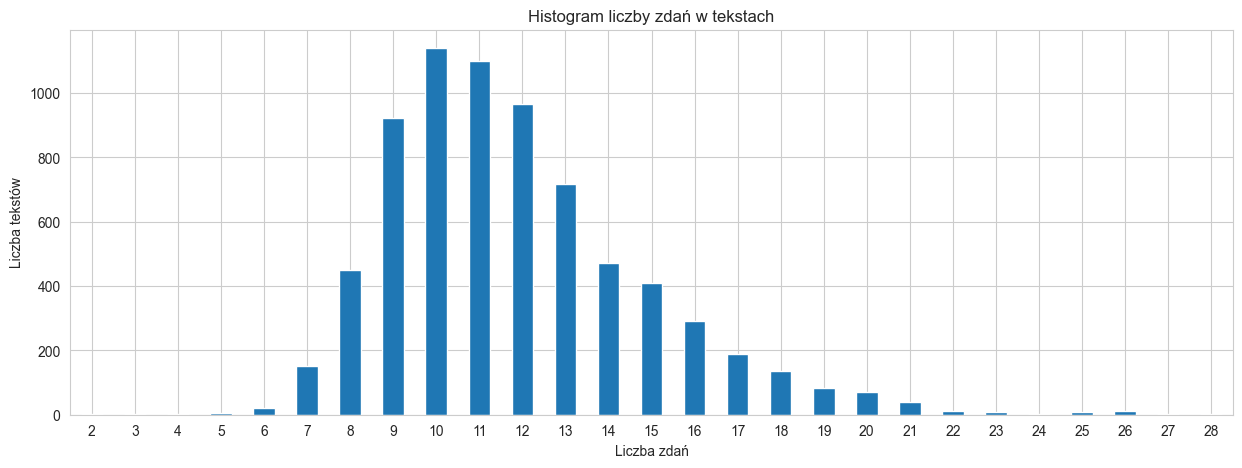

Texts with more than 20 sentences count: 87


In [66]:
counts = text_chunks_count.value_counts().sort_index()
counts.plot(kind='bar', figsize=(15, 5), title='Histogram liczby zdań w tekstach', xlabel='Liczba zdań', ylabel='Liczba tekstów')
plt.xticks(rotation=0)
plt.show()
print(f'Texts with more than 20 sentences count: {counts[counts.index > 20].sum()}')

### Example usage

In [67]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score

import string

In [68]:
def preprocess_text(text):
  text = text.lower()
  text = text.translate(str.maketrans('', '', string.punctuation))
  return text

In [69]:
textual_dataset['text'] = textual_dataset['text'].apply(preprocess_text)
X = textual_dataset.drop(['cik', 'label'], axis=1)
y = textual_dataset['label']

X_train, y_train, X_val, y_val, X_test, y_test = get_train_val_test_split(X, y)

X_train = X_train['text']
X_val = X_val['text']
X_test = X_test['text']

len(X_train), len(X_val), len(X_test)

(5760, 363, 1091)

In [70]:
vectorizer = TfidfVectorizer(max_features=1000)
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

X_train_features.shape, X_test_features.shape

((5760, 1000), (1091, 1000))

In [71]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train_features, y_train)

y_pred = model.predict(X_test_features)

In [72]:
confusion_matrix(y_test, y_pred)

array([[1046,   34],
       [   2,    9]], dtype=int64)

In [73]:
print(f'accuracy_score: {accuracy_score(y_test, y_pred)}')
print(f'precision_score: {precision_score(y_test, y_pred)}')
print(f'f1_score: {f1_score(y_test, y_pred)}')

accuracy_score: 0.9670027497708524
precision_score: 0.20930232558139536
f1_score: 0.3333333333333333


In [74]:
new_texts = [
    "The company is experiencing steady revenue growth and profitability.",
    "The company is facing a class-action lawsuit and a potential product recall.",
    "The company is struggling to meet its financial obligations and may be at risk of insolvency."
]

for text in new_texts:
    new_text_features = vectorizer.transform([preprocess_text(text)])
    prediction = model.predict(new_text_features)[0]
    
    if prediction:
        print(f"Text: {text}\nPredicted: Bankruptcy")
    else:
        print(f"Text: {text}\nPredicted: Not Bankruptcy")

Text: The company is experiencing steady revenue growth and profitability.
Predicted: Not Bankruptcy
Text: The company is facing a class-action lawsuit and a potential product recall.
Predicted: Not Bankruptcy
Text: The company is struggling to meet its financial obligations and may be at risk of insolvency.
Predicted: Bankruptcy


### Useful functions to work with the dataset

#### Function aligning the textual dataset with financial dataset

Shuffle the financial dataset and then check if the textual dataset is aligned with the financial dataset after using custom function.

In [141]:
financial_dataset_shuffled = shuffle_data_by_object(financial_dataset)
financial_dataset_shuffled.head(10)

cik ticker  label subset Fiscal Period  Cost of Goods Sold  \
0  136890002    NaN   True  train           NaN               161.0   
1  136890002    NaN   True  train           NaN               161.0   
2  136890002    NaN   True  train           NaN               245.0   
3  136890002    NaN   True  train           NaN               293.0   
4  136890002    NaN   True  train           NaN               259.0   
5    1336920   LDOS  False  train      Dec 2016              6103.0   
6    1336920   LDOS  False  train      Dec 2017              8738.0   
7    1336920   LDOS  False  train      Dec 2018              8690.0   
8    1336920   LDOS  False  train      Dec 2019              9546.0   
9    1336920   LDOS  False  train      Dec 2020             10560.0   

   Depreciation, Depletion and Amortization    EBIT  EBITDA  Gross Profit  \
0                                       9.0    41.0    50.0         205.0   
1                                       9.0    41.0    50.0         205.0   
2                                      14.0    30.0    44.0         266.0   
3                                      21.0   -31.0    -9.0         279.0   
4                                      21.0   -49.0   -28.0         223.0   
5                                     122.0   414.0   536.0         940.0   
6                                     336.0   541.0   877.0        1432.0   
7                                     257.0   755.0  1012.0        1504.0   
8                                     234.0  1013.0  1247.0        1548.0   
9                                     282.0   963.0  1245.0        1737.0   

   ...  Net Income  Retained Earnings  Revenue  Total Assets  \
0  ...        24.0              213.0    368.0         227.0   
1  ...        24.0              213.0    368.0         227.0   
2  ...        15.0              226.0    511.0         430.0   
3  ...       -34.0              187.0    573.0         355.0   
4  ...       -34.0              147.0    482.0         314.0   
5  ...       244.0             -177.0   7043.0        9132.0   
6  ...       366.0               -7.0  10170.0        8990.0   
7  ...       581.0              372.0  10194.0        8770.0   
8  ...       667.0              896.0  11094.0        9367.0   
9  ...       628.0             1328.0  12297.0       12511.0   

   Total Current Assets  Total Current Liabilities  Total Inventories  \
0                 155.0                       52.0               55.0   
1                 155.0                       52.0               55.0   
2                 213.0                      111.0              106.0   
3                 192.0                      133.0              102.0   
4                 152.0                       82.0               81.0   
5                2381.0                     2016.0               67.0   
6                2674.0                     2202.0               72.0   
7                2839.0                     2059.0               72.0   
8                2812.0                     2333.0               72.0   
9                3339.0                     2907.0              276.0   

   Total Liabilities  Total Operating Expense  Total Receivables  
0               64.0                    169.0               25.0  
1               64.0                    169.0               25.0  
2              249.0                    236.0               43.0  
3              196.0                    310.0               37.0  
4              184.0                    269.0               36.0  
5             5985.0                    422.0             1660.0  
6             5607.0                    737.0             1831.0  
7             5459.0                    729.0             1877.0  
8             5950.0                    689.0             1734.0  
9             8640.0                    770.0             2137.0  

[10 rows x 22 columns]

In [142]:
def match_textual_data_with_financial_data(textual_dataset, financial_dataset):
    financial_dataset_ciks = financial_dataset['cik'].unique()
    
    textual_dataset_copy = textual_dataset.copy()
    textual_dataset_copy['cik'] = pd.Categorical(textual_dataset_copy['cik'], categories=financial_dataset_ciks, ordered=True)
    textual_dataset_copy = textual_dataset_copy.sort_values('cik').reset_index(drop=True)
    
    assert financial_dataset_ciks.tolist() == textual_dataset_copy['cik'].tolist()
    
    return textual_dataset_copy

In [143]:
textual_dataset_copy = match_textual_data_with_financial_data(textual_dataset, financial_dataset_shuffled)
textual_dataset_copy.head()

cik  label subset  \
0  136890002   True  train   
1    1336920  False  train   
2     772349   True  train   
3    1082564  False  train   
4    1014133  False  train   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        Over 128,000 businesses, as well as 10 million people per week, are served by the company, which publishes local print and digital media in the US.  Their print advertising revenue has declined despite their diverse portfolio and strong local presence as a result of economic weakness, big box retailer competition, and a secular shift towards digital media.  A digital platform is being invested in by the company to combat this change.  The company has reduced costs by suspending dividends, implementing cost-cutting programs, and selling non-core assets.  In light of declining same-store revenue and profitability, they acknowledge the risks associated with high leverage.  Accounting policies include estimating and judging goodwill, long-lived assets, derivatives, revenue recognition, taxation, pension and postretirement liabilities, and self-insurance liability accruals.  Its total revenue declined by 5% in 2012, primarily due to declines in print advertising, but it experienced growth in digital advertising.  Consolidation and permanent cost reductions resulted in lower operating costs and SG&A expenses.  In spite of the current economic environment and the company's high leverage, the company believes they still have sufficient liquidity for the next year.  Transformational strategies include cost reduction, digital growth, 

## Experiment on financial dataset with simple MLP

In [75]:
import torch
import torch.nn as nn
import torch.optim as optim

In [76]:
from torch.utils.data import DataLoader, TensorDataset

financial_dataset = pd.read_csv('numerical_dataset_oversampled.csv')
financial_dataset_preprocessed = financial_dataset.drop(['cik', 'ticker', 'Fiscal Period'], axis=1)
X = financial_dataset_preprocessed.drop('label', axis=1)
y = financial_dataset_preprocessed['label']

X_train, y_train, X_val, y_val, X_test, y_test = get_train_val_test_split(X, y)

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [77]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val.values, dtype=torch.float32).view(-1, 1)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

In [78]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [79]:
class MLPWithDropout(nn.Module):
    def __init__(self, input_size):
        super(MLPWithDropout, self).__init__()
        self.linear = nn.Sequential(
            nn.Linear(input_size, 128, bias=True),
            nn.ReLU(),
            nn.Dropout(p=0.1),
            nn.Linear(128, 128, bias=True),
            nn.ReLU(),
            nn.Dropout(p=0.1),
            nn.Linear(128, 64, bias=True),
            nn.ReLU(),
            nn.Dropout(p=0.1),
            nn.Linear(64, 16, bias=True),
            nn.ReLU(),
            nn.Linear(16, 1, bias=True),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.linear(x)

input_size = 17
learning_rate = 0.001
num_epochs = 5

model = MLPWithDropout(input_size)
criterion = nn.BCELoss()
optimizer = optim.AdamW(model.parameters(), lr=learning_rate)

In [80]:
for epoch in range(num_epochs):
    model.train()
    for inputs, targets in train_loader:
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/5], Loss: 0.4611
Epoch [2/5], Loss: 0.2850
Epoch [3/5], Loss: 0.1903
Epoch [4/5], Loss: 0.3281
Epoch [5/5], Loss: 0.1942


In [81]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        predicted = (outputs > 0.5).float()
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Test Accuracy: 86.40%
